In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

Data source: https://stats.oecd.org/Index.aspx?DataSetCode=MIG#

In [50]:
employment_by_place_edu = pd.read_csv("../data/MIG_EMP_EDUCATION_22022024161838929.csv")
employment_by_place_edu.head()

,COUNTRY,Country,BIRTH,Place of birth,HATLEV1D,Educational attainment,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,FB,Foreign-born,T,Total,2015,2015,PC,Percentage,0,Units,NaN,NaN,72.3,NaN,NaN
1,AUS,Australia,FB,Foreign-born,T,Total,2016,2016,PC,Percentage,0,Units,NaN,NaN,72.6,NaN,NaN
2,AUS,Australia,FB,Foreign-born,T,Total,2017,2017,PC,Percentage,0,Units,NaN,NaN,73.7,NaN,NaN
3,AUS,Australia,FB,Foreign-born,T,Total,2018,2018,PC,Percentage,0,Units,NaN,NaN,74.5,NaN,NaN
4,AUS,Australia,FB,Foreign-born,T,Total,2019,2019,PC,Percentage,0,Units,NaN,NaN,75.1,NaN,NaN


In [51]:
employment_by_place_edu = employment_by_place_edu.drop(columns=employment_by_place_edu.columns[[12, 13, 15, 16]])


In [28]:
employment_by_place_edu['Year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2000, 2007, 2008,
       2009, 2010, 2011, 2012, 2003, 2004, 2005, 2006, 2013, 2014])

In [52]:
employment_by_place_edu['Place of birth'].unique()

array(['Foreign-born', 'Native-born'], dtype=object)

In [53]:
employment_by_place_edu['Educational attainment'].unique()

array(['Total', 'Low', 'Medium', 'High'], dtype=object)

In [54]:
employment_by_place_edu['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czechia', 'Denmark',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Luxembourg', 'Mexico', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'Slovak Republic',
       'Spain', 'Sweden', 'Switzerland', 'United Kingdom',
       'United States', 'Brazil', 'Chile', 'Estonia', 'Indonesia',
       'Israel', 'Russia', 'Slovenia', 'South Africa',
       'European Union (27 countries)', 'Türkiye',
       'European Union (28 countries)', 'Latvia', 'Lithuania', 'Colombia',
       'Costa Rica'], dtype=object)

In [55]:
employment_by_place_edu = employment_by_place_edu[employment_by_place_edu['Educational attainment'] != 'Total'].sort_values(by='Value', ascending=False)
employment_by_place_edu.head()

,COUNTRY,Country,BIRTH,Place of birth,HATLEV1D,Educational attainment,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Value
147,DNK,Denmark,FB,Foreign-born,H,High,2022,2022,PC,Percentage,0,Units,94.5
1262,ISL,Iceland,NB,Native-born,H,High,2016,2016,PC,Percentage,0,Units,94.0
1629,SWE,Sweden,NB,Native-born,H,High,2018,2018,PC,Percentage,0,Units,93.3
1630,SWE,Sweden,NB,Native-born,H,High,2019,2019,PC,Percentage,0,Units,93.3
1263,ISL,Iceland,NB,Native-born,H,High,2017,2017,PC,Percentage,0,Units,93.2


In [43]:
employment_by_place_edu.head()

,COUNTRY,Country,BIRTH,Place of birth,HATLEV1D,Educational attainment,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Value
147,DNK,Denmark,FB,Foreign-born,H,High,2022,2022,PC,Percentage,0,Units,94.5
1262,ISL,Iceland,NB,Native-born,H,High,2016,2016,PC,Percentage,0,Units,94.0
1629,SWE,Sweden,NB,Native-born,H,High,2018,2018,PC,Percentage,0,Units,93.3
1630,SWE,Sweden,NB,Native-born,H,High,2019,2019,PC,Percentage,0,Units,93.3
1263,ISL,Iceland,NB,Native-born,H,High,2017,2017,PC,Percentage,0,Units,93.2


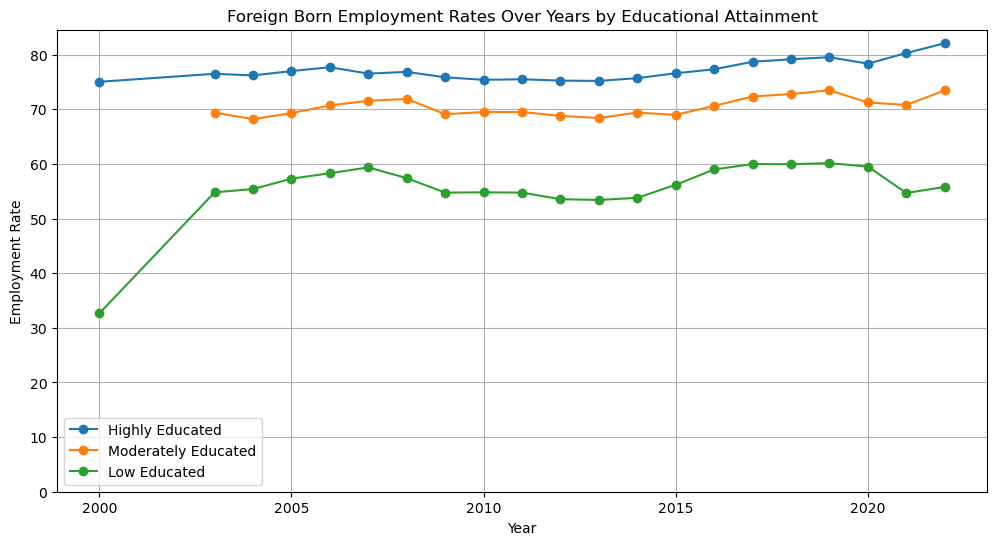

In [56]:
employment_by_year = employment_by_place_edu[employment_by_place_edu['BIRTH'] != "NB"].groupby(['Year', 'Educational attainment'])['Value'].mean().reset_index()

plt.figure(figsize=(12, 6))

high_employment_rate = employment_by_year[employment_by_year['Educational attainment'] == "High"]
medium_employment_rate = employment_by_year[employment_by_year['Educational attainment'] == "Medium"]
low_employment_rate = employment_by_year[employment_by_year['Educational attainment'] == "Low"]

plt.plot(high_employment_rate['Year'], high_employment_rate['Value'], marker='o', label='Highly Educated')
plt.plot(medium_employment_rate['Year'], medium_employment_rate['Value'], marker='o', label='Moderately Educated')
plt.plot(low_employment_rate['Year'], low_employment_rate['Value'], marker='o', label='Low Educated')

plt.ylim(0) 
plt.title('Foreign Born Employment Rates Over Years by Educational Attainment')
plt.xlabel('Year')
plt.ylabel('Employment Rate')
plt.grid(True)
plt.legend()
plt.show()

In [22]:
top_5_countries = employment_by_place_edu['COUNTRY'].head(5)
top_5_countries

20     DNK
152    ISL
148    HUN
196    SWE
200    CHE
Name: COUNTRY, dtype: object

In [23]:
top_5_countries_df = employment_by_place_edu[employment_by_place_edu['COUNTRY'].isin(top_5_countries)]
top_5_countries_df.head()

,COUNTRY,Country,BIRTH,Place of birth,HATLEV1D,Educational attainment,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
20,DNK,Denmark,FB,Foreign-born,H,High,2022,2022,PC,Percentage,0,Units,NaN,NaN,94.5,NaN,NaN
152,ISL,Iceland,NB,Native-born,H,High,2022,2022,PC,Percentage,0,Units,NaN,NaN,92.4,NaN,NaN
148,HUN,Hungary,NB,Native-born,H,High,2022,2022,PC,Percentage,0,Units,NaN,NaN,91.6,NaN,NaN
196,SWE,Sweden,NB,Native-born,H,High,2022,2022,PC,Percentage,0,Units,NaN,NaN,91.6,NaN,NaN
200,CHE,Switzerland,NB,Native-born,H,High,2022,2022,PC,Percentage,0,Units,NaN,NaN,91.3,NaN,NaN


In [9]:
employment_by_place_edu['Educational attainment'].unique()
employment_by_place_edu['Place of birth'].unique()

array(['Foreign-born', 'Native-born'], dtype=object)

In [10]:
employment_by_place_edu.shape

(235, 13)

In [24]:
#  pie chart based on place of birth and value
for country in top_5_countries_df['COUNTRY'].unique():
    fig = px.pie(employment_by_place_edu[employment_by_place_edu['COUNTRY'] == country], values='Value', names='Place of birth', title=f'Employment by Place of Birth for {country}', hole=0.5, labels={'Place of birth': 'Place of Birth', 'Value': 'Percentage of Employment'})
    fig.show()
